# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

737

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
# save config information and define the query url based on the city name and units=imperial as we want Fahrenheits
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#empty lists for response data
new_cities = []
country = []
lon = []
lat = []
humidity = []
temp_max=[]
wind = []
cloudiness = []
# we will need to transform date format
date = []
query_url = f"{url}appid={weather_api_key}&units={units}&q="
count=0
loop=1
#cities = ["London", "Prague", "Bratislava", "New York", "Rimavska Sobota", "Bakta"]

# collect the weather data for cities
# using enumerate: https://book.pythontips.com/en/latest/enumerate.html

print("Begining collecting data")
print("-----------------------------")
for i, city in enumerate(cities):
    count=count+1
    # splitting cities in sets of 50 to loop through and request API + using time.sleep() function to wait before
    # looping another set (resource: https://amiradata.com/python-sleep-time-python-wait/)
    # open weather API allows 60 requests per minute, so we set our limit to 50 and wait 10sec
    if count==51:
        count=1
        loop = loop+1
        time.sleep(10)
        
    print(f"Making request {count} in set {loop} for {i}: {city}.")
    weather_json = requests.get(query_url + city).json()

    try:
        country.append(weather_json["sys"]["country"])
        lon.append(weather_json["coord"]["lon"])
        lat.append(weather_json["coord"]["lat"])
        humidity.append(weather_json["main"]["humidity"])
        temp_max.append(weather_json["main"]["temp_max"])
        wind.append(weather_json["wind"]["speed"])
        cloudiness.append(weather_json["clouds"]["all"])
        date.append(weather_json["dt"])
        # add cities at the end,  if the error occurrs in previous, it will be skipped, performed in chronological order
        new_cities.append(city)
        
    except(KeyError):
        print(f"Missing data ....Skipping!")
        
print("-----------------------------")
print("END")

Begining collecting data
-----------------------------
Making request 1 in set 1 for 0: hami.
Making request 2 in set 1 for 1: albany.
Making request 3 in set 1 for 2: mataura.
Making request 4 in set 1 for 3: faanui.
Making request 5 in set 1 for 4: augustow.
Making request 6 in set 1 for 5: mys shmidta.
Missing data ....Skipping!
Making request 7 in set 1 for 6: busselton.
Making request 8 in set 1 for 7: bambey.
Making request 9 in set 1 for 8: bethel.
Making request 10 in set 1 for 9: mwanza.
Making request 11 in set 1 for 10: san policarpo.
Making request 12 in set 1 for 11: trairi.
Making request 13 in set 1 for 12: acapulco.
Making request 14 in set 1 for 13: saint george.
Making request 15 in set 1 for 14: manzanillo.
Making request 16 in set 1 for 15: ushuaia.
Making request 17 in set 1 for 16: provideniya.
Making request 18 in set 1 for 17: choix.
Making request 19 in set 1 for 18: ostrovnoy.
Making request 20 in set 1 for 19: yellowknife.
Making request 21 in set 1 for 20: k

In [101]:
print(len(country))
print(len(new_cities))

684
684


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
weather_dict = {
    "City": new_cities,
    "Country": country,
    "Lat": lat,
    "Lng": lon,
    "Max Temp (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed(mph)": wind,
    "Date": date
}

weather_cities = pd.DataFrame(weather_dict)
weather_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             684 non-null    object 
 1   Country          684 non-null    object 
 2   Lat              684 non-null    float64
 3   Lng              684 non-null    float64
 4   Max Temp (F)     684 non-null    float64
 5   Humidity (%)     684 non-null    int64  
 6   Cloudiness (%)   684 non-null    int64  
 7   Wind Speed(mph)  684 non-null    float64
 8   Date             684 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 48.2+ KB


In [103]:
weather_cities.head()

,City,Country,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
0,hami,CN,42.80,93.45,45.91,46,0,2.73,1603489829
1,albany,US,42.60,-73.97,70.00,72,83,1.99,1603489831
2,mataura,NZ,-46.19,168.86,64.99,61,60,8.01,1603489833
3,faanui,PF,-16.48,-151.75,78.85,74,13,8.55,1603489479
4,augustow,PL,53.84,22.98,48.97,95,66,4.18,1603490000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [104]:
weather_cities.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,6.840000e+02
mean,21.903611,20.225000,59.217997,74.241228,52.160819,7.828772,1.603490e+09
std,33.014204,89.114284,20.888844,19.915605,39.238064,5.820598,2.558075e+02
min,-54.800000,-175.200000,-4.000000,12.000000,0.000000,0.340000,1.603489e+09
25%,-5.095000,-58.935000,42.800000,66.000000,6.750000,3.620000,1.603490e+09
50%,27.710000,23.005000,64.990000,78.000000,58.000000,6.575000,1.603490e+09
75%,50.235000,98.722500,76.410000,89.000000,90.000000,10.290000,1.603490e+09
max,78.220000,179.320000,96.240000,100.000000,100.000000,38.590000,1.603490e+09


In [107]:
max_humidity = weather_cities["Cloudiness (%)"].max()
max_cloudiness = weather_cities["Cloudiness (%)"].max()
if (max_cloudiness > 100) or (max_humidity > 100):
    print(f"There is error in data, cloudiness max is {max_cloudiness}, humidity max is {max_humidity}")
else:
    print(f"data are ok, none % over 100")

data are ok, no % over 100


In [111]:
# Export the weather data into a csv
weather_cities.to_csv(output_data_file, index=False)

In [149]:
# reading data from csv to new plot so we do not have to run previous part always
weather_df=pd.read_csv(output_data_file)
weather_df.head()

,City,Country,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
0,hami,CN,42.80,93.45,45.91,46,0,2.73,1603489829
1,albany,US,42.60,-73.97,70.00,72,83,1.99,1603489831
2,mataura,NZ,-46.19,168.86,64.99,61,60,8.01,1603489833
3,faanui,PF,-16.48,-151.75,78.85,74,13,8.55,1603489479
4,augustow,PL,53.84,22.98,48.97,95,66,4.18,1603490000


In [150]:
# parse the Date to easier readible format
weather_df["Date"] = pd.to_datetime(weather_df['Date'], unit='s').dt.strftime('%m/%d/%Y')
weather_df.head()


,City,Country,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
0,hami,CN,42.80,93.45,45.91,46,0,2.73,10/23/2020
1,albany,US,42.60,-73.97,70.00,72,83,1.99,10/23/2020
2,mataura,NZ,-46.19,168.86,64.99,61,60,8.01,10/23/2020
3,faanui,PF,-16.48,-151.75,78.85,74,13,8.55,10/23/2020
4,augustow,PL,53.84,22.98,48.97,95,66,4.18,10/23/2020


In [151]:
weather_df['Date'].describe()

count            684
unique             1
top       10/23/2020
freq             684
Name: Date, dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

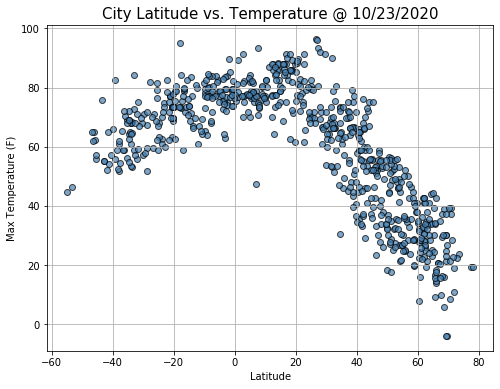

In [256]:
date=weather_df["Date"].unique()[0]
latitude = weather_df['Lat']
temperature = weather_df['Max Temp (F)']
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(latitude,temperature, marker='o', color='steelblue', alpha=0.7, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Temperature @ {date}', fontsize=15)
plt.savefig("output_data/latitude_temperature.png")
plt.show();

## Latitude vs. Humidity Plot

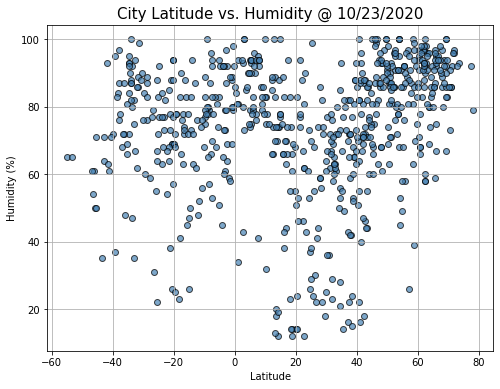

In [257]:
humidity = weather_df['Humidity (%)']
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(latitude,humidity, marker='o', color='steelblue', alpha=0.7, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity @ {date}', fontsize=15)
plt.savefig("output_data/latitude_humidity.png")
plt.show();

## Latitude vs. Cloudiness Plot

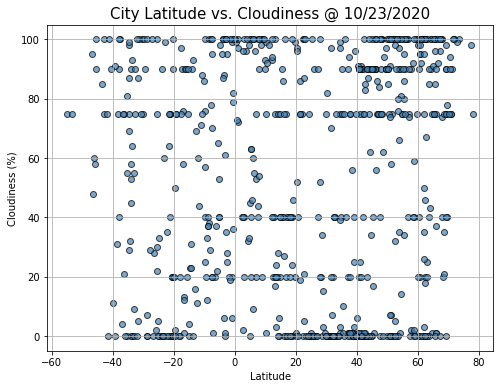

In [258]:
cloudiness = weather_df['Cloudiness (%)']
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(latitude,cloudiness, marker='o', color='steelblue', alpha=0.7, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness @ {date}', fontsize=15)
plt.savefig("output_data/latitude_cloudiness.png")
plt.show();

## Latitude vs. Wind Speed Plot

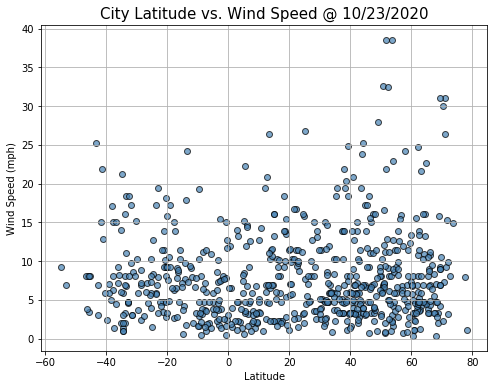

In [259]:
wind_speed = weather_df['Wind Speed(mph)']
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(latitude, wind_speed, marker='o', color='steelblue', alpha=0.7, edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed @ {date}', fontsize=15)
plt.savefig("output_data/latitude_windspeed.png")
plt.show();

## Linear Regression

In [297]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearRegressionPlot (x_values, y_values, ylabel, title, eq_placement):
    # fig size
    fig,ax = plt.subplots(figsize=(8,6))
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values,color='steelblue', alpha=0.7, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f'{title} Regression Analysis')
    plt.annotate(line_eq,eq_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    return plt.savefig("./output_data/"+title+".png")
    return plt.show()

In [277]:
# Create Northern and Southern Hemisphere DataFrames
north=weather_df.loc[weather_df['Lat']>=0]
south=weather_df.loc[weather_df['Lat']<0]
north.head()
south.head()

,City,Country,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
2,mataura,NZ,-46.19,168.86,64.99,61,60,8.01,10/23/2020
3,faanui,PF,-16.48,-151.75,78.85,74,13,8.55,10/23/2020
5,busselton,AU,-33.65,115.33,53.01,47,0,11.01,10/23/2020
8,mwanza,TZ,-2.52,32.90,74.95,69,25,7.58,10/23/2020
10,trairi,BR,-3.28,-39.27,79.39,79,0,10.13,10/23/2020


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.756882150950984


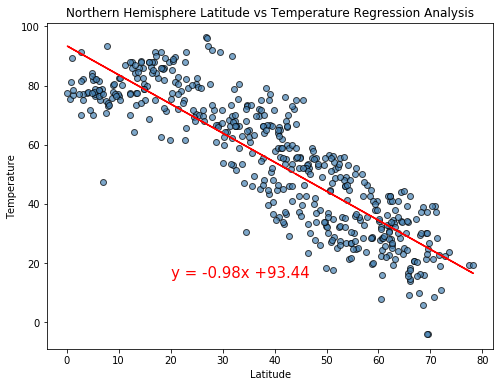

In [298]:
# Create a Scatter Plot for temperature vs latitude
x_values=north['Lat']
y_values=north['Max Temp (F)']
eq_placement=(20,15)

linearRegressionPlot(x_values, y_values, 'Temperature', 'Northern Hemisphere Latitude vs Temperature', eq_placement)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43773973059076254


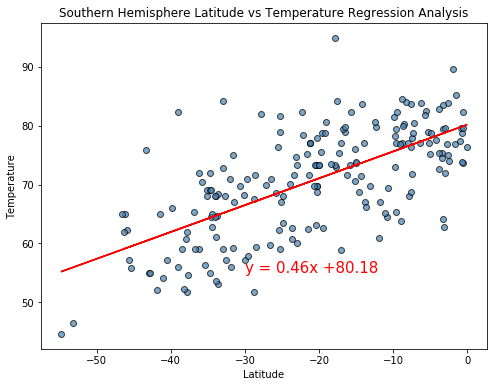

In [299]:
x_values=south['Lat']
y_values=south['Max Temp (F)']
eq_placement=(-30,55)

linearRegressionPlot(x_values, y_values, 'Temperature', 'Southern Hemisphere Latitude vs Temperature', eq_placement)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09081804649319444


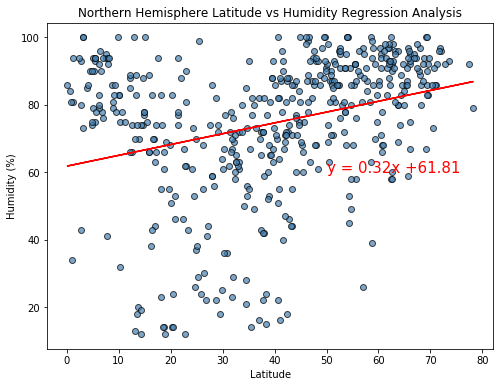

In [300]:
x_values=north['Lat']
y_values=north['Humidity (%)']
eq_placement=(50,60)

linearRegressionPlot(x_values, y_values, 'Humidity (%)', 'Northern Hemisphere Latitude vs Humidity', eq_placement)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008123326806056793


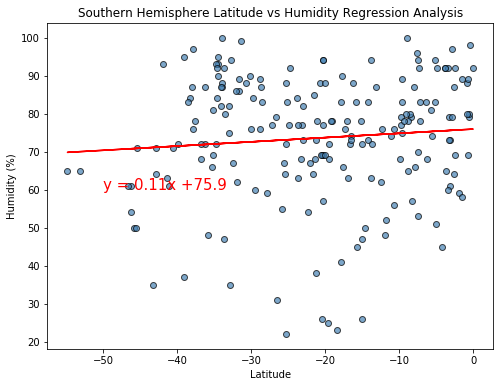

In [301]:
x_values=south['Lat']
y_values=south['Humidity (%)']
eq_placement=(-50,60)

linearRegressionPlot(x_values, y_values, 'Humidity (%)', 'Southern Hemisphere Latitude vs Humidity', eq_placement)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019250058546691214


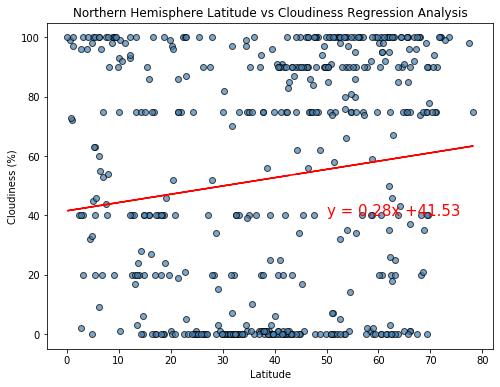

In [302]:
x_values=north['Lat']
y_values=north['Cloudiness (%)']
eq_placement=(50,40)

linearRegressionPlot(x_values, y_values, 'Cloudiness (%)', 'Northern Hemisphere Latitude vs Cloudiness', eq_placement)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002238633635783378


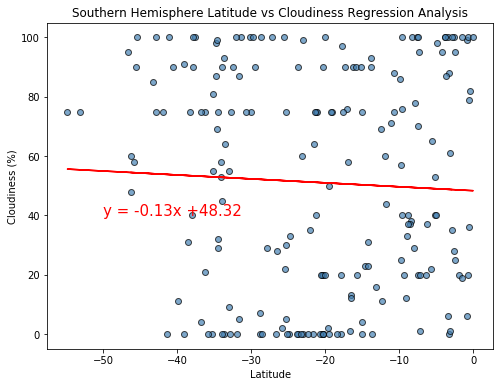

In [303]:
x_values=south['Lat']
y_values=south['Cloudiness (%)']
eq_placement=(-50,40)

linearRegressionPlot(x_values, y_values, 'Cloudiness (%)', 'Southern Hemisphere Latitude vs Cloudiness', eq_placement)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0075257180675828116


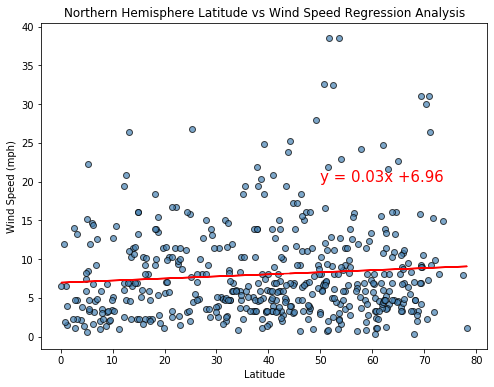

In [304]:
x_values=north['Lat']
y_values=north['Wind Speed(mph)']
eq_placement=(50,20)

linearRegressionPlot(x_values, y_values, 'Wind Speed (mph)', 'Northern Hemisphere Latitude vs Wind Speed', eq_placement)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03466247047179546


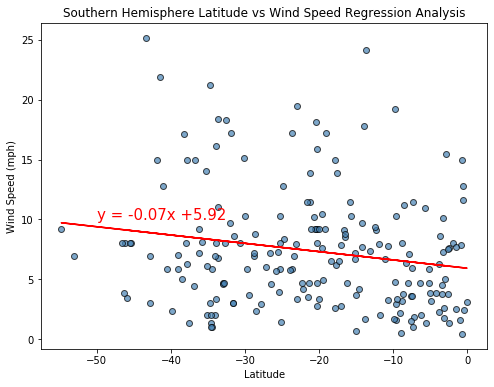

In [305]:
x_values=south['Lat']
y_values=south['Wind Speed(mph)']
eq_placement=(-50,10)

linearRegressionPlot(x_values, y_values, 'Wind Speed (mph)', 'Southern Hemisphere Latitude vs Wind Speed', eq_placement)